In [12]:
from __future__ import division
from __future__ import print_function
import os
import sys
from time import time
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist
from math import ceil
from pandas import Series
# Import all models

from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

import warnings
warnings.filterwarnings("ignore")

**对所有csv进行测试，拟合全体数据，计算并保存每个csv个各种算法的AUC值**

In [16]:
from sklearn.metrics import roc_curve, auc
algorithm_list=pd.DataFrame(columns=['CBLOF' ,'FB','HBOS','IF','AVG_KNN','Loc KNN','LOF','MCD','OCSVM','PCA'])
temp=0
index=[]
anormal=[]
random_state = np.random.RandomState(42)
#for file in os.listdir("Outlier_wine/benchmarks"):
for file in os.listdir("Outlier_abalone/benchmarks/"):
    #file="Outlier_wine/benchmarks/"+file
    index.append(file)   
    file="Outlier_abalone/benchmarks/"+file
    abalone_df=pd.read_csv(file,encoding="utf-8")
    gt=abalone_df["ground.truth"]
    count = gt.value_counts()
    outliers_fraction=count[1]/(count[0]+count[1])
    gt=abalone_df[["ground.truth"]]
    
   

    # Define nine outlier detection tools to be compared
    classifiers = {
        'Cluster-based Local Outlier Factor (CBLOF)':
            CBLOF(contamination=outliers_fraction,
                  check_estimator=False, random_state=random_state),
            'Feature Bagging':
            FeatureBagging(LOF(n_neighbors=35),
                           contamination=outliers_fraction,
                           random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(
            contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,
                                    random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(
            contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',
                           contamination=outliers_fraction),
        'Local Outlier Factor (LOF)':
            LOF(n_neighbors=35, contamination=outliers_fraction),
        'Minimum Covariance Determinant (MCD)': MCD(
            contamination=outliers_fraction, random_state=random_state),
        'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
        'Principal Component Analysis (PCA)': PCA(
            contamination=outliers_fraction, random_state=random_state),

    }
    abalone_data1=abalone_df.iloc[:,[4]]
    abalone_data2=abalone_df.iloc[:,7:13]
    abalone_data=abalone_data1.join(abalone_data2)
    gt.loc[gt["ground.truth"]=="nominal"]=0
    gt.loc[gt["ground.truth"]=="anomaly"]=1
    abalone_data=abalone_data.values
   
    
    df_array=[]
    # Define nine outlier detection tools to be compared
    for i, (clf_name, clf) in enumerate(classifiers.items()):
   
        # fit the data and tag outliers
        clf.fit(abalone_data)
        scores_pred = clf.decision_function(abalone_data) * -1
        y_pred = clf.predict(abalone_data)
        n_inliers = len(y_pred) - np.count_nonzero(y_pred)
        n_outliers = np.count_nonzero(y_pred == 1)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred.flatten() != gt.values.flatten()).sum()
        fpr, tpr, threshold = roc_curve(y_pred, gt.values.flatten())  ###计算真正率和假正率
        roc_auc = auc(fpr, tpr)  ###计算auc的值
        df_array.append(roc_auc)
        lw = 2


    algorithm_list.loc[temp]=df_array
    temp+=1
    print(file+"读取结束")

Outlier_abalone/benchmarks/abalone_benchmark_0001.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0002.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0003.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0004.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0005.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0006.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0007.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0008.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0009.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0010.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0011.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0012.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0013.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0014.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0015.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0016.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0017.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_0148.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0149.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0150.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0151.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0152.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0153.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0154.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0155.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0156.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0157.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0158.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0159.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0160.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0161.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0162.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0163.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0164.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_0290.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0291.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0292.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0293.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0294.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0295.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0296.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0297.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0298.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0299.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0300.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0301.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0302.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0303.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0304.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0305.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0306.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_0492.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0493.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0494.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0495.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0496.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0497.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0498.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0499.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0500.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0501.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0502.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0503.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0504.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0505.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0506.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0507.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0508.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_0634.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0635.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0636.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0637.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0638.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0639.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0640.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0641.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0642.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0643.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0644.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0645.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0646.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0647.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0648.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0649.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0650.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_0781.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0782.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0783.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0784.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0785.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0786.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0787.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0788.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0789.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0790.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0791.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0792.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0793.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0794.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0795.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0796.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0797.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_0923.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0924.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0925.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0926.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0927.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0928.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0929.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0930.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0931.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0932.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0933.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0934.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0935.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0936.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0937.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0938.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_0939.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_1065.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1066.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1067.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1068.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1069.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1070.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1071.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1072.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1073.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1074.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1075.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1076.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1077.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1078.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1079.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1080.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1081.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_1212.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1213.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1214.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1215.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1216.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1217.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1218.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1219.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1220.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1221.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1222.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1223.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1224.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1225.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1226.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1227.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1228.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_1354.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1355.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1356.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1357.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1358.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1359.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1360.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1361.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1362.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1363.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1364.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1365.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1366.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1367.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1368.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1369.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1370.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_1496.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1497.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1498.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1499.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1500.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1501.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1502.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1503.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1504.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1505.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1506.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1507.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1508.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1509.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1510.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1511.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1512.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_1638.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1639.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1640.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1641.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1642.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1643.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1644.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1645.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1646.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1647.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1648.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1649.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1650.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1651.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1652.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1653.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1654.csv读取结束
Outlier_abalon

Outlier_abalone/benchmarks/abalone_benchmark_1780.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1781.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1782.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1783.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1784.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1785.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1786.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1787.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1788.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1789.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1790.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1791.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1792.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1793.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1794.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1795.csv读取结束
Outlier_abalone/benchmarks/abalone_benchmark_1796.csv读取结束
Outlier_abalon

**读取所有CSV文件，计算并保存每种算法的AUC值**

In [24]:
index=[]
for file in os.listdir("Outlier_abalone/benchmarks/"):
    index.append(file)
algorithm_list.index=[index]
algorithm_list.head(30)

,CBLOF,FB,HBOS,IF,AVG_KNN,Loc KNN,LOF,MCD,OCSVM,PCA
abalone_benchmark_0001.csv,0.619293,0.555314,0.407200,0.362660,0.677660,0.655826,0.568690,0.705191,0.524911,0.445376
abalone_benchmark_0002.csv,0.621856,0.562689,0.420047,0.421633,0.671522,0.645744,0.571731,0.690716,0.519096,0.425871
abalone_benchmark_0003.csv,0.607374,0.530136,0.386511,0.391820,0.647890,0.631695,0.552945,0.683827,0.520303,0.419428
abalone_benchmark_0004.csv,0.616376,0.563261,0.426494,0.415531,0.665450,0.660571,0.560139,0.722643,0.540926,0.447411
abalone_benchmark_0005.csv,0.570905,0.562338,0.389732,0.408803,0.668146,0.640326,0.567668,0.694866,0.533823,0.427874
abalone_benchmark_0006.csv,0.608185,0.549578,0.366086,0.374023,0.671045,0.642078,0.558113,0.675996,0.523420,0.429120
abalone_benchmark_0007.csv,0.610106,0.571895,0.387073,0.425755,0.682221,0.661717,0.583036,0.716056,0.532763,0.434231
abalone_benchmark_0008.csv,0.602869,0.528415,0.345413,0.347524,0.673478,0.661150,0.554898,0.690809,0.508571,0.401559
abalone_benchmark_0009.csv,0.576274,0.563181,0.402015,0.437502,0.678060,0.656864,0.572717,0.701274,0.527545,0.436443
abalone_benchmark_0010.csv,0.600634,0.575761,0.383472,0.416311,0.677502,0.649845,0.594322,0.710804,0.533896,0.424786


In [25]:
algorithm_list.to_csv("abalone_1800.csv",header=True,index=True)

In [26]:
algorithm_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1725 entries, abalone_benchmark_0001.csv to abalone_benchmark_1800.csv
Data columns (total 10 columns):
CBLOF      1725 non-null float64
FB         1725 non-null float64
HBOS       1725 non-null float64
IF         1725 non-null float64
AVG_KNN    1725 non-null float64
Loc KNN    1703 non-null float64
LOF        1724 non-null float64
MCD        1725 non-null float64
OCSVM      1725 non-null float64
PCA        1725 non-null float64
dtypes: float64(10)
memory usage: 148.2+ KB


In [2]:
import pandas as pd
auc_data=pd.read_csv("abalone_1800.csv",encoding="utf-8")
auc_data.head()

,Unnamed: 0,CBLOF,FB,HBOS,IF,AVG_KNN,Loc KNN,LOF,MCD,OCSVM,PCA
0,abalone_benchmark_0001.csv,0.619293,0.555314,0.407200,0.362660,0.677660,0.655826,0.568690,0.705191,0.524911,0.445376
1,abalone_benchmark_0002.csv,0.621856,0.562689,0.420047,0.421633,0.671522,0.645744,0.571731,0.690716,0.519096,0.425871
2,abalone_benchmark_0003.csv,0.607374,0.530136,0.386511,0.391820,0.647890,0.631695,0.552945,0.683827,0.520303,0.419428
3,abalone_benchmark_0004.csv,0.616376,0.563261,0.426494,0.415531,0.665450,0.660571,0.560139,0.722643,0.540926,0.447411
4,abalone_benchmark_0005.csv,0.570905,0.562338,0.389732,0.408803,0.668146,0.640326,0.567668,0.694866,0.533823,0.427874


**对这些算法进行一个初略的可视化来确定其分布**

In [3]:
import matplotlib.pyplot as plt
def HistDraw(i,auc_data_g,name):

    auc_data_g=auc_data[[name]]
    auc_data_g.hist(bins=30,alpha = 0.8) 
    plt.xlabel('Values of AUC')
    plt.ylabel('Frequency')
    plt.show()

['Unnamed: 0', 'CBLOF', 'FB', 'HBOS', 'IF', 'AVG_KNN', 'Loc KNN', 'LOF', 'MCD', 'OCSVM', 'PCA']
-----------------------------------------各算法整体CSV上性能的直方图表示如下--------------------------------------------


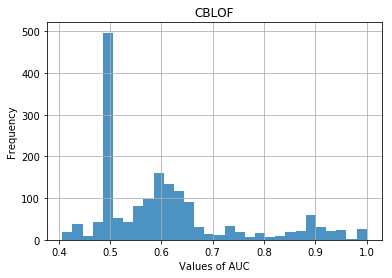

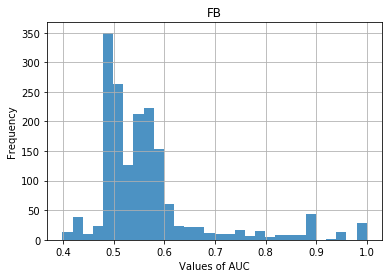

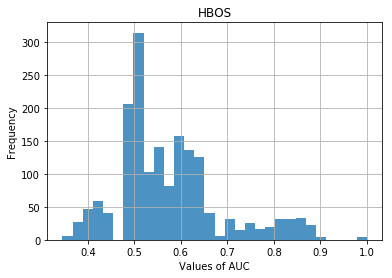

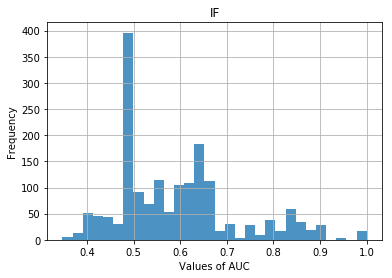

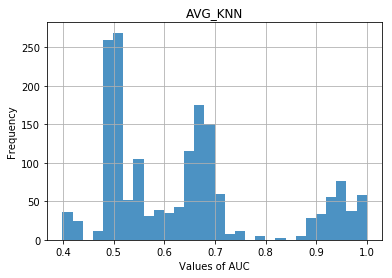

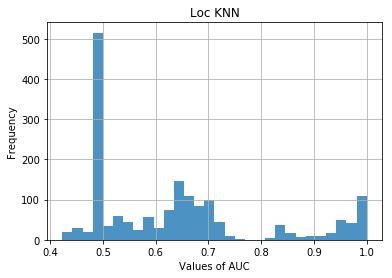

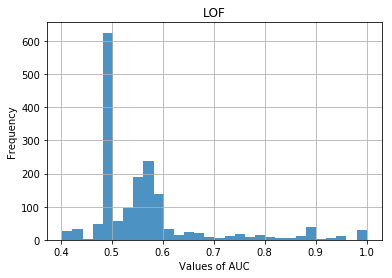

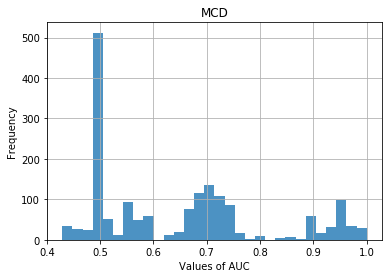

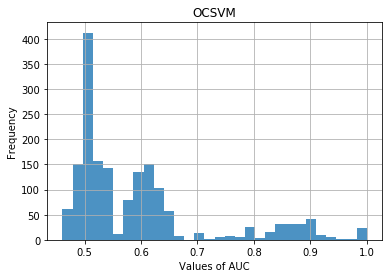

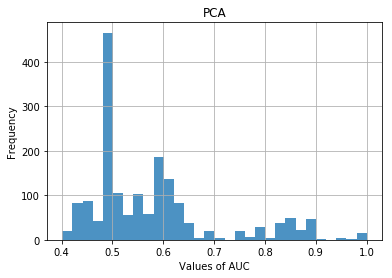

In [4]:
auc_array=auc_data.columns.values.tolist()
print(auc_array)
print("-----------------------------------------各算法整体CSV上性能的直方图表示如下--------------------------------------------")
for i in range(1,len(auc_array)):
    HistDraw(i,auc_data[auc_array[i]],auc_array[i])


**该可视化的效果较比wine数据库的效果更好，数据的分布更加多样化，但在abalone_benchmarks中全部csv在每个算法中的大头占比依旧在0.5左右，若看算法性能，则MCD算法和AVG_KNN算法的效果优秀，MCD在0.7和[0.9,1]之间集中了一批数据，说明在该CSV中检测异常点效果好的大概有500个左右。同样AVG_KNN算法类似**